In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from src.strategy import SMACrossoverStrategy, RSIStrategy, BollingerStrategy
from src.data_utils import preprocess_data, calculate_features

In [2]:
data  = pd.read_csv('./data/BSE_Sensex_30_Historical_Data_2021_2024.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      991 non-null    object
 1   Price     991 non-null    object
 2   Open      991 non-null    object
 3   High      991 non-null    object
 4   Low       991 non-null    object
 5   Vol.      991 non-null    object
 6   Change %  991 non-null    object
dtypes: object(7)
memory usage: 54.3+ KB


In [4]:
df = preprocess_data(data)

/home/screa/Desktop/Sem10/StratArm/src/data_utils.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,47868.98,47785.28,47980.36,47771.15,8270000.0,0.0025
1,2021-01-04,48176.80,48109.17,48220.47,47594.47,13870000.0,0.0064
2,2021-01-05,48437.78,48037.63,48486.24,47903.38,12180000.0,0.0054
3,2021-01-06,48174.06,48616.66,48616.66,47864.14,22500000.0,-0.0054
4,2021-01-07,48093.32,48524.36,48558.34,48037.87,18430000.0,-0.0017


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      991 non-null    datetime64[ns]
 1   Price     991 non-null    float64       
 2   Open      991 non-null    float64       
 3   High      991 non-null    float64       
 4   Low       991 non-null    float64       
 5   Vol.      991 non-null    float64       
 6   Change %  991 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 54.3 KB


In [7]:
feature = calculate_features(df)

In [8]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 49 to 990
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      942 non-null    datetime64[ns]
 1   Price     942 non-null    float64       
 2   Open      942 non-null    float64       
 3   High      942 non-null    float64       
 4   Low       942 non-null    float64       
 5   Vol.      942 non-null    float64       
 6   Change %  942 non-null    float64       
 7   SMA_20    942 non-null    float64       
 8   SMA_50    942 non-null    float64       
 9   RSI       942 non-null    float64       
 10  BB_MA20   942 non-null    float64       
 11  BB_STD20  942 non-null    float64       
 12  BB_UPPER  942 non-null    float64       
 13  BB_LOWER  942 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 110.4 KB


In [9]:
from src.bandit_algorithms import Eps_Greedy, Thompson_Sampling
from src.simulator import Simulator

In [10]:
strategies = [
        SMACrossoverStrategy(),
        RSIStrategy(),
        BollingerStrategy(),
    ]
# swap MAB algorithms as needed:
mab = Eps_Greedy(len(strategies), horizon=len(df))
# mab = UCB(len(strategies), horizon=len(df))
# mab = KL_UCB(len(strategies), horizon=len(df))
# mab = ThompsonSampling(len(strategies), horizon=len(df))

sim = Simulator(df, strategies, mab)
results = sim.run()


KeyError: 'all_rewards'

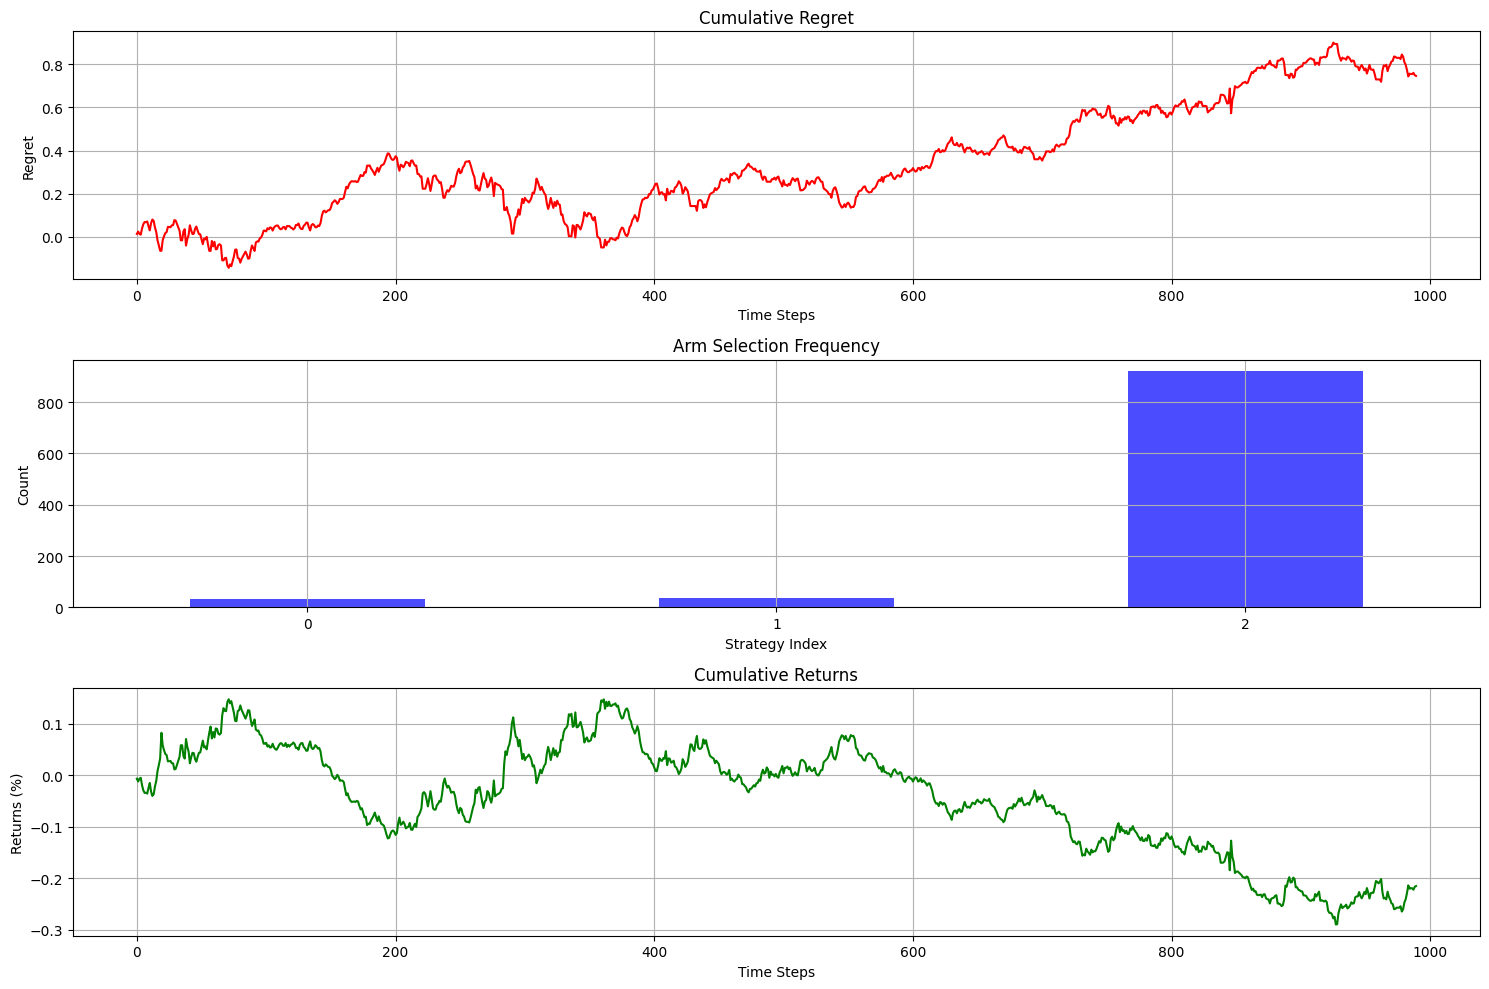

In [ ]:
sim.plot_results()